Linear Models in Numpy
======================

Despite the simplicity, linear models can be applicable in many scenarios. For example, a traditional model for document sentiment classification can be achieved by collecting a set of features (e.g. fequency of positive and negative words by looking up [SentiWordNet](https://github.com/aesuli/SentiWordNet), and model the sentiment score as a linear combination of the features.  Linear models can be seen as the simplest type of neural networks without non-linear activation functions.

Notebook adapted from [Github of Deep Learning with Pytorch: Step by Step](https://github.com/dvgodoy/PyTorchStepByStep/blob/master/Chapter01.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation
### Generating a synthetic dataset
We define a linear line $y = 2x +1$ and add random small guassian noise for the synthetic dataset.  

In [2]:
true_b = 1
true_w = 2
N = 100
# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
# Guassian noise to add some randomness to y
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

In [3]:
print("The epsilon is in the range of [%3.2f, %3.2f]" % (min(epsilon), max(epsilon)))

The epsilon is in the range of [-0.20, 0.25]


### Splitting the dataset to training and validation
Next, let's split our synthetic data into train and validation sets, shuffling the array of indexes and using the first 80 shuffled points for training, the rest of 20 for validation. 

In [4]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)
# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]
# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [5]:
def figure1(x_train, y_train, x_val, y_val):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].scatter(x_train, y_train)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_ylim([0, 3.1])
    ax[0].set_title('Generated Data - Train')

    ax[1].scatter(x_val, y_val, c='r')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_ylim([0, 3.1])
    ax[1].set_title('Generated Data - Validation')
    fig.tight_layout()
    
    return fig, ax

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <AxesSubplot:title={'center':'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

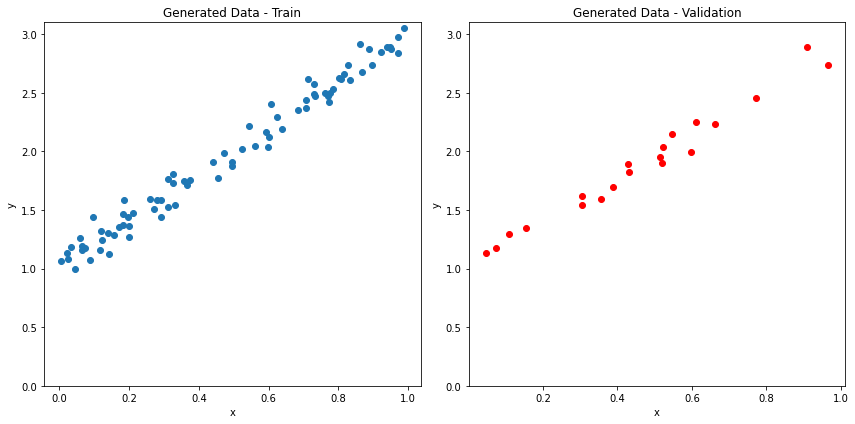

In [6]:
figure1(x_train, y_train, x_val, y_val)

## Gradient Descent

### Step 0: Random Initialization
For training a model, you need to randomly initialize the parameters/weights (we
have only two, $b$ and $w$).

In [7]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
print(b, w)

[0.49671415] [-0.1382643]


### Step 1: Compute Predication



In [8]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train
yhat

array([[0.390075  ],
       [0.4879263 ],
       [0.37737776],
       [0.4931996 ],
       [0.39550552],
       [0.48647642],
       [0.46923887],
       [0.4537164 ],
       [0.43142369],
       [0.36265521],
       [0.47984062],
       [0.38954095],
       [0.38579895],
       [0.39583566],
       [0.48320959],
       [0.47115538],
       [0.47514234],
       [0.49386805],
       [0.36026292],
       [0.41053427],
       [0.39881299],
       [0.41404593],
       [0.36925186],
       [0.40856271],
       [0.45787094],
       [0.46093412],
       [0.48017854],
       [0.39591849],
       [0.36551716],
       [0.41271239],
       [0.41910955],
       [0.42843985],
       [0.47157425],
       [0.45919627],
       [0.36261025],
       [0.46735523],
       [0.47135586],
       [0.37695291],
       [0.44492863],
       [0.45644756],
       [0.38494166],
       [0.48868326],
       [0.38161705],
       [0.42167866],
       [0.38994027],
       [0.3740443 ],
       [0.4844788 ],
       [0.490

### Step 2 - Compute the Loss
For a regression problem, the loss is given by the Mean Squared Error (MSE), that
is, the average of all squared errors, that is, the average of all squared differences between labels ($y$) and predictions ($b + wx$).

For a regression problem, the loss is given by the Mean Squared Error (MSE), that
is, the average of all squared errors, that is, the average of all squared differences between labels (y) and predictions (b + wx).

\begin{flalign}
MSE & =\frac{1}{n} \sum_{i=1}^n error_i^2 \\
 & = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)
 ^2\\
 & = \frac{1}{n} \sum_{i=1}^n (b + wx_i - y_i)^2\\
\end{flalign}

In the code below, we are using all data points of the training set to compute the
loss, so $n = N = 80$, meaning we are performing batch gradient descent.

In [9]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. 

# How wrong is our model? This is the error!
error = (yhat - y_train)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.7421577700550976


:::{admonition} Batch, Mini-batch, and Stochastic Gradient Descent
:class: dropdown, tip
- if we use all points in the training set (n = N) to compute the
loss, we are performing a batch gradient descent
- if we were to use a single point (n = 1) each time, it would be a
stochastic gradient descent
- anything else (n) in-between 1 and N characterizes a minibatch
gradient descent
:::

### Step 3 - Compute the gradient
A gradient is a partial derivative — why partial? Because one computes it with
respect to (w.r.t.) a single parameter. We have two parameters, b and w, so we must
compute two partial derivatives.

A derivative tells you how much a given quantity changes when you slightly vary
some other quantity. In our case, how much does our MSE loss change when we
vary each one of our two parameters separately?

In [10]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


### Step 4 - Update the Parameters
In the final step, we use the gradients to update the parameters. Since we are
trying to minimize our losses, we reverse the sign of the gradient for the update.
There is still another (hyper-)parameter to consider: the learning rate, denoted by
the Greek letter alpha, which is the multiplicative factor
that we need to apply to the gradient for the parameter update.

In [11]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1
print(b, w)
# Step 4 - Updates parameters using gradients and
# the learning rate
b = b - lr * b_grad
w = w - lr * w_grad
print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


### Step 5 - Rinse and Repeat!
Now we use the updated parameters to go back to Step 1 and restart the process.
:::{admonition} Definition of Epoch
An epoch is complete whenever every point in the training set
(N) has already been used in all steps: forward pass, computing
loss, computing gradients, and updating parameters.
:::

In [12]:
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent.
    # How wrong is our model? This is the error!
    error = (yhat - y_train) 
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Step 3 - Computes gradients for both "b" and "w" parameters
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()

    # Step 4 - Updates parameters using gradients and
    # the learning rate
    b = b - lr * b_grad
    w = w - lr * w_grad

print(b, w)

[1.02354093] [1.96896412]


## Sanity Check using Scikit-Learn

Just to make sure we haven’t done any mistakes in our code, we can use Scikit-
Learn's Linear Regression to fit the model and compare the coefficients.

In [13]:
from sklearn.linear_model import LinearRegression
# Sanity Check: do we get the same results as our
# gradient descent?
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]
